In [2]:
%load_ext autoreload
%autoreload 2

In [26]:
from pygraphon.graphons.StepGraphon import StepGraphon
import numpy as np
from pygraphon.plots.plot_matrices import spy
import matplotlib.pyplot as plt
from pygraphon.utils.utils_graph import edge_density
from tqdm import tqdm

In [4]:
graphon_matrix = np.array([[0.8,0.4,0.4],[0.4,0.8,0.4],[0.4,0.4,0.8]])
graphon = StepGraphon(graphon_matrix,1/3)

In [5]:
print(graphon.integral(graphon_matrix), graphon.integral())

0.5333333333333333 0.9999999999999999


In [6]:
graphon.graphon

array([[1.5 , 0.75, 0.75],
       [0.75, 1.5 , 0.75],
       [0.75, 0.75, 1.5 ]])

In [7]:
from pygraphon.plots.plot_matrices import spy
import matplotlib.pyplot as plt

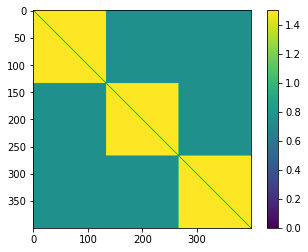

In [8]:
plt.imshow(graphon._get_edge_probabilities(400,False,True))
plt.colorbar()
plt.show()

In [9]:
A = graphon.draw(rho = 0.03,n = 300, exchangeable=False)

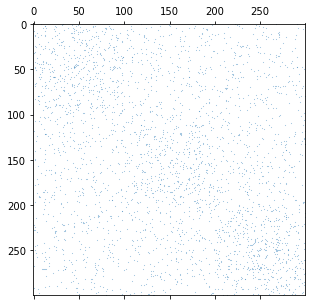

In [10]:
fig, ax = spy(A)
plt.show()

In [11]:
edge_density(A)

0.030858416945373467

In [12]:
print(edge_density(A[0:100,0:100]))
print(edge_density(A[0:100,100:200]))

0.04787878787878788
0.023636363636363636


In [13]:
from pygraphon.estimators.HistogramEstimator import HistogramEstimator
from pygraphon.estimators.MomentEstimator import MomentEstimator, SimpleMomentEstimator

import matlab.engine
eng = matlab.engine.start_matlab()

In [14]:
hist = HistogramEstimator(eng, bandwithHist= 1/3)
hist_epprox = hist.estimate(adjacency_matrix= A)

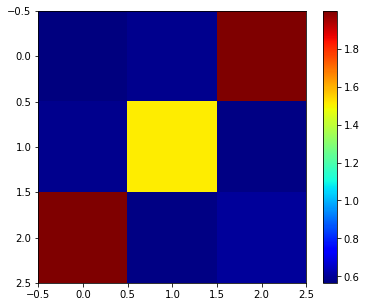

In [15]:
from pygraphon.plots.plots_graphon import plot
plot(hist_epprox)
plt.show()

In [16]:
momsimple = SimpleMomentEstimator(3,eng)
mome_simple_approx = momsimple.estimate(adjacency_matrix= A)

In [17]:
momsimple._count_cycles(A)

array([3.04444444e-05, 8.71111111e-07, 2.50534979e-08, 7.62979424e-10,
       2.27813352e-11, 6.74752995e-13, 1.99554659e-14])

In [20]:
from pygraphon.subgraph_isomorphism.CycleCount import CycleCount
counter = CycleCount(eng, L = 9)

In [31]:
pbar = tqdm(total=300)
for rho in tqdm([0.01,0.1,0.2,0.3,0.4,0.5]):
    for n in [100,200,300,400,500]:
        for r in range(10):
            A = graphon.draw(rho = rho,n = n, exchangeable=False)
            count_python = counter.network_profile(adjacency_matrix= A)
            count_matlab = counter(adjacency_matrix= A)
            assert np.allclose(count_matlab,count_python)
            pbar.update(1)

 13%|█▎        | 38/300 [03:38<1:15:28, 17.28s/it]

In [55]:
d = np.sum(A,axis = 0)
unz = np.nonzero(np.sum(A, axis = 0))[0]

In [ ]:
np.sum(A@A@A)

2573106428.0

In [ ]:
np.sum(np.diag(A @ A @ A))

8754438.0

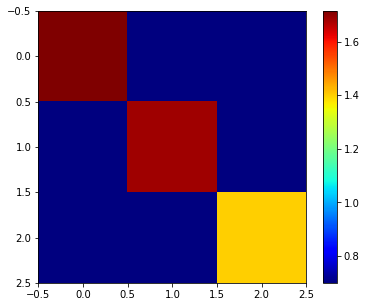

In [ ]:
plot(mome_simple_approx)
plt.show()

In [ ]:
mome_simple_approx.graphon

array([[1.71437621, 0.70034399, 0.70034399],
       [0.70034399, 1.68347843, 0.70034399],
       [0.70034399, 0.70034399, 1.40008141]])

In [ ]:
mome_simple_approx.integral()

1.0000000000000002

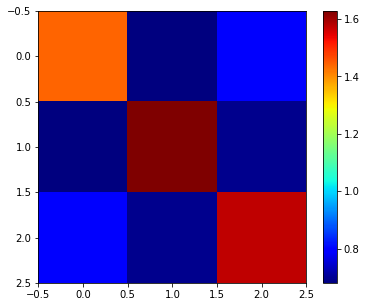

In [ ]:
mom = MomentEstimator(3,eng)
mom_approx = mom.estimate(adjacency_matrix= A)
plot(mom_approx)
plt.show()

In [ ]:
mom_approx.graphon

array([[1.44116679, 0.6810337 , 0.8019572 ],
       [0.6810337 , 1.62785706, 0.694572  ],
       [0.8019572 , 0.694572  , 1.57585037]])

In [ ]:
mom_approx.integral()

1.0000000000000002